In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
# Leer archivo CSV
df_csv = pd.read_csv('Datos_emisiones.csv', sep=';')
df_csv

,num,Country,Continent,cat,Energy,Energy_indust,Manufacturing,Transport,Other_sectors,Fugitive_emissions,...,L_Energy,L_Energy_indust,L_Manufacturing,L_Transport,L_Other_sectors,L_Fugitive_emissions,L_Industrial_processes,L_Solvents,L_Agriculture,L_Waste
0,1,Australia,Oceania,3,400931.18,219457.01,47244.59,79079.45,19413.73,34492.23,...,12.901545,219457.01,10.763115,11.278208,9.873736,10.448518,10.254243,0.000000,11.408816,9.718357
1,2,Austria,Europa,2,69845.50,15508.05,15983.59,23119.30,14175.79,930.89,...,11.154041,15508.05,9.679380,10.048423,9.559291,6.837215,9.284807,5.956588,8.973393,7.694871
2,3,Belarus,Europa,3,57634.39,32520.65,8576.21,5616.94,8605.40,1666.15,...,10.961875,32520.65,9.056864,8.633542,9.060145,7.418871,8.349551,4.226688,9.543084,8.540646
3,4,Belgium,Europa,2,110860.22,27691.96,27630.14,26101.71,28790.88,550.30,...,11.616025,27691.96,10.226699,10.169756,10.267814,6.312279,9.578978,5.520861,9.228506,7.107425
4,5,Bulgaria,Europa,3,52204.10,29300.76,10287.62,8719.18,2065.95,1793.10,...,10.862916,29300.76,9.238794,9.073280,7.633345,7.492259,8.823794,4.032469,8.459791,8.931922
5,6,Canada,America,2,583099.57,184845.26,64179.54,192124.73,75158.11,66791.93,...,13.276113,184845.26,11.069455,12.165900,11.227349,11.109353,10.904846,5.778766,11.032370,9.948810
6,7,Croatia,Europa,2,22548.37,6656.55,3767.99,6225.93,3763.25,2134.65,...,10.023418,6656.55,8.234562,8.736478,8.233038,7.666526,8.295149,5.211615,8.162944,6.382374
7,8,Czech Republic,Europa,1,121778.38,56899.24,27907.77,18197.29,12047.15,5650.67,...,11.709958,56899.24,10.236696,9.809028,9.396583,8.639706,9.601677,6.242087,8.941763,8.154618
8,9,Denmark,Europa,4,56902.52,29878.49,5711.72,13582.50,7087.42,514.57,...,10.949095,29878.49,8.650451,9.516537,8.866077,6.245273,7.823234,4.943712,9.170158,7.190141
9,10,Estonia,Europa,3,16310.97,12123.08,541.69,2427.56,433.29,785.35,...,9.699593,12123.08,6.296538,7.794642,6.071407,6.667402,6.485566,0.000000,7.092291,6.562373


In [3]:
# Agrupar el DataFrame por continente y categoría
# y calcular estadísticas descriptivas para las columnas 'Transport' y 'Energy_indust'
resumen = df_csv.groupby(['Continent', 'cat'])[['Transport', 'Energy_indust']].agg(
    [
        "mean",          # media
        "max",           # valor máximo
        "min",           # valor mínimo
        "std",           # desviación estándar
        "var",           # varianza
        lambda x: x.isna().sum(),  # número de valores faltantes
        "count"          # número de valores no nulos
    ]
)

# Renombrar la columna generada por lambda (que aparece como '<lambda_0>')
# Esto es necesario porque pandas nombra automáticamente las funciones lambda como '<lambda_0>', '<lambda_1>', etc.
# Aquí se reemplaza '<lambda_0>' por 'nummissing' para mayor claridad
resumen.columns = [
    (col[0], col[1]) if col[1] != "<lambda_0>" else (col[0], "nummissing")
    for col in resumen.columns
]

resumen

(Transport, mean)  (Transport, max)  (Transport, min)  \
Continent cat                                                          
America   2         1.921247e+05         192124.73         192124.73   
          4         1.868472e+06        1868471.54        1868471.54   
Asia      3         2.500398e+05         250039.78         250039.78   
Europa    1         3.089627e+04         191071.42             34.15   
          2         5.533293e+04         162011.16           3453.93   
          3         1.855532e+04          44394.14           2427.56   
          4         4.157071e+04         133197.60             82.52   
Oceania   2         1.440636e+04          14406.36          14406.36   
          3         7.907945e+04          79079.45          79079.45   

               (Transport, std)  (Transport, var)  (Transport, nummissing)  \
Continent cat                                                                
America   2                 NaN               NaN                        0   
          4                 NaN               NaN                        0   
Asia      3                 NaN               NaN                        0   
Europa    1        54534.266579      2.973986e+09                        0   
          2        63975.755833      4.092897e+09                        0   
          3        16008.598908      2.562752e+08                        0   
          4        54967.883019      3.021468e+09                        0   
Oceania   2                 NaN               NaN                        0   
          3                 NaN               NaN                        0   

               (Transport, count)  (Energy_indust, mean)  \
Continent cat                                              
America   2                     1           1.848453e+05   
          4                     1           2.360262e+06   
Asia      3                     1           3.885095e+05   
Europa    1                    11           1.090284e+05   
          2                    10           9.503565e+04   
          3                     7           3.834490e+04   
          4                     7           4.694827e+04   
Oceania   2                     1           9.570740e+03   
          3                     1           2.194570e+05   

               (Energy_indust, max)  (Energy_indust, min)  \
Continent cat                                               
America   2               184845.26             184845.26   
          4              2360262.44            2360262.44   
Asia      3               388509.45             388509.45   
Europa    1               904255.09                 23.04   
          2               370170.73               2103.31   
          3                90885.52              12123.08   
          4               159818.54                  2.80   
Oceania   2                 9570.74               9570.74   
          3               219457.01             219457.01   

               (Energy_indust, std)  (Energy_indust, var)  \
Continent cat                                               
America   2                     NaN                   NaN   
          4                     NaN                   NaN   
Asia      3                     NaN                   NaN   
Europa    1           265899.955270          7.070279e+10   
          2           123715.414594          1.530550e+10   
          3            28185.325352          7.944126e+08   
          4            64469.062791          4.156260e+09   
Oceania   2                     NaN                   NaN   
          3                     NaN                   NaN   

               (Energy_indust, nummissing)  (Energy_indust, count)  
Continent cat                                                       
America   2                              0                       1  
          4                              0                       1  
Asia      3                              0                       1  
Europa    1  

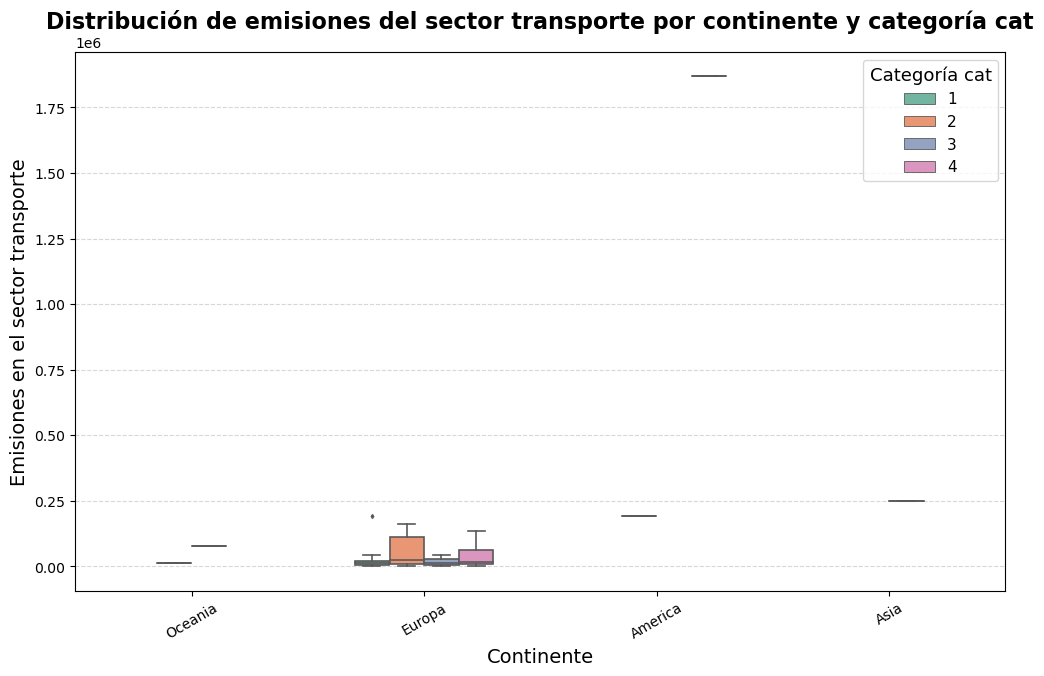

In [4]:
plt.figure(figsize=(12, 7))

# Boxplot con mejor estilo
ax = sns.boxplot(
    data=df_csv,
    x='Continent',
    y='Transport',
    hue='cat',
    palette='Set2',
    width=0.6,
    fliersize=2,   # Tamaño de los puntos atípicos
    linewidth=1.2
)

# Etiquetas y título
plt.title('Distribución de emisiones del sector transporte por continente y categoría cat', fontsize=16, weight='bold')
plt.xlabel('Continente', fontsize=14)
plt.ylabel('Emisiones en el sector transporte', fontsize=14)

# Ajuste de leyenda
plt.legend(title='Categoría cat', title_fontsize=13, fontsize=11, loc='upper right')

# Rotar etiquetas 
plt.xticks(rotation=30)
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
plt.show()

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

def graficar_densidad(df, columna, color="#A7C7E7"):
    """
    Grafica la distribución de densidad (KDE) para una variable numérica.

    Parámetros:
    - df: DataFrame con los datos.
    - columna: Nombre de la columna numérica a graficar.
    - color: Color de la curva de densidad.
    """
    datos = df[columna].dropna()

    print(f"\n📈 Curva de densidad para: {columna}")
    print("Esta gráfica muestra cómo se distribuyen los valores de la variable.")

    # Graficar KDE
    plt.figure(figsize=(10, 5))
    sns.kdeplot(datos, color=color, fill=True, linewidth=2, alpha=0.5)

    # Etiquetas
    plt.title(f"Densidad de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Densidad estimada")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## **<span style="color:#1a73e8;">KRUSKAL - WALLIS</span>**


📈 Curva de densidad para: Transport
Esta gráfica muestra cómo se distribuyen los valores de la variable.


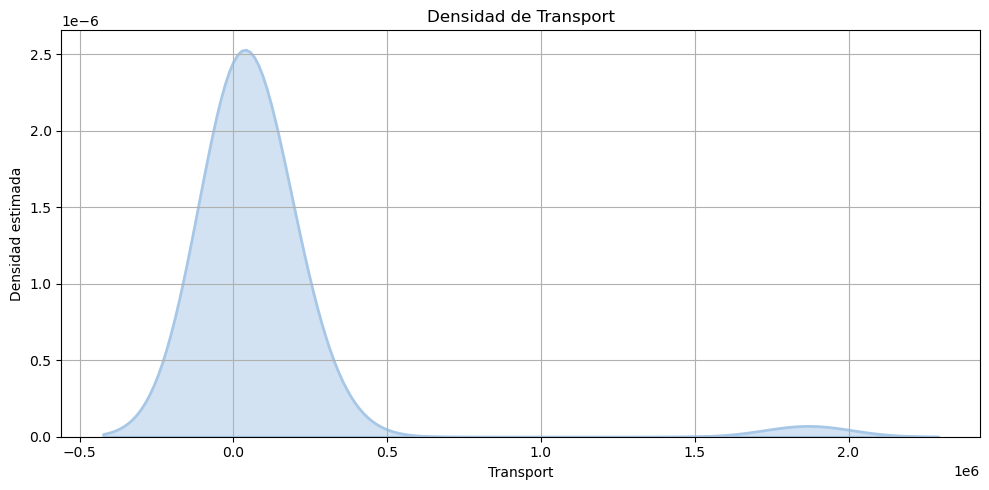

In [6]:
graficar_densidad(df_csv, 'Transport', '#A7C7E7')


📈 Curva de densidad para: L_Transport
Esta gráfica muestra cómo se distribuyen los valores de la variable.


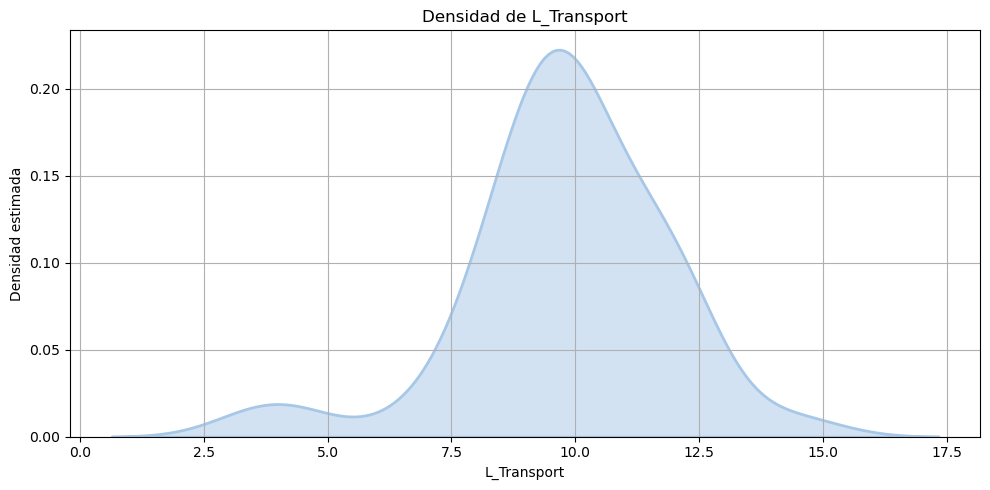

In [7]:
graficar_densidad(df_csv, 'L_Transport', '#A7C7E7')

In [8]:
# Definimos los grupos de datos para comparar según el continente y la variable 'Transport'.
# El método 'dropna()' se usa para eliminar cualquier valor faltante de la columna 'Transport'.
grupo_1 = df_csv[df_csv['Continent'] == 'Oceania']['Transport'].dropna()  # Grupo de Oceanía
grupo_2 = df_csv[df_csv['Continent'] == 'Europa']['Transport'].dropna()   # Grupo de Europa
grupo_3 = df_csv[df_csv['Continent'] == 'Asia']['Transport'].dropna()     # Grupo de Asia
grupo_4 = df_csv[df_csv['Continent'] == 'America']['Transport'].dropna()  # Grupo de América

# Ajustamos un modelo de regresión lineal para analizar la relación entre 'Transport' y 'Continent'.
# Utilizamos el método 'ols' de statsmodels para realizar este análisis.
modelo = ols('Transport ~ C(Continent)', data=df_csv).fit()

# 3. Normalidad de los residuos
# Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo.
# Realizamos una prueba de normalidad sobre los residuos usando el test de Shapiro-Wilk.
residuos = modelo.resid
shapiro_test = stats.shapiro(residuos)

# Imprimimos el resultado de la prueba de normalidad.
print("\n--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---")
print(f"Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}")

# Si el p-valor es mayor que 0.05, no rechazamos la hipótesis nula, lo que indica que los residuos tienen distribución normal.
# Si el p-valor es menor que 0.05, rechazamos la hipótesis nula y los residuos no siguen una distribución normal.
if shapiro_test.pvalue > 0.05:
    print("→ Los residuos tienen distribución normal.")
else:
    print("→ Los residuos NO tienen distribución normal.")

# 4. Homogeneidad de varianzas
# La prueba de Levene evalúa si las varianzas de los grupos son homogéneas, es decir, si todos los grupos tienen varianzas similares.
levene = stats.levene(grupo_1, grupo_2, grupo_3, grupo_4)

# Imprimimos el resultado de la prueba de homogeneidad de varianzas.
print("\n--- Prueba de homogeneidad de varianzas (Levene) ---")
print(f"Estadístico={levene.statistic:.4f}, p-valor={levene.pvalue}")

# Si el p-valor es mayor que 0.05, podemos concluir que las varianzas son homogéneas (no hay diferencias significativas entre ellas).
# Si el p-valor es menor que 0.05, las varianzas son heterogéneas (existen diferencias significativas entre las varianzas).
if levene.pvalue > 0.05:
    print("→ Varianzas homogéneas.")
else:
    print("→ Varianzas heterogéneas.")

# Nota importante : En este ejemplo, la prueba de Levene sugiere que las varianzas son heterogéneas. 
# Sin embargo, si se aplica una transformación logarítmica a los datos (por ejemplo, 'log(Transport)'), las varianzas podrían volverse homogéneas. 
# Esto se debe a que la transformación logarítmica tiende a reducir la heterogeneidad en las varianzas, especialmente si los datos tienen una distribución sesgada o asimétrica.


--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---
Estadístico=0.4825, p-valor=1.0638649683425427e-10
→ Los residuos NO tienen distribución normal.

--- Prueba de homogeneidad de varianzas (Levene) ---
Estadístico=191.4338, p-valor=3.549214219437512e-22
→ Varianzas heterogéneas.


In [9]:
# Primero, agrupamos los datos de acuerdo al continente y la variable transformada 'L_Transport'.
# Usamos 'dropna()' para eliminar cualquier valor nulo o faltante en la columna 'L_Transport'.
grupo_1 = df_csv[df_csv['Continent'] == 'Oceania']['L_Transport'].dropna()  # Grupo de Oceanía
grupo_2 = df_csv[df_csv['Continent'] == 'Europa']['L_Transport'].dropna()   # Grupo de Europa
grupo_3 = df_csv[df_csv['Continent'] == 'Asia']['L_Transport'].dropna()     # Grupo de Asia
grupo_4 = df_csv[df_csv['Continent'] == 'America']['L_Transport'].dropna()  # Grupo de América

# Ajustamos un modelo de regresión lineal para analizar la relación entre 'L_Transport' (variable transformada) y 'Continent'.
# El modelo 'ols' de statsmodels nos ayuda a ajustar la relación categórica entre 'Continent' y la variable 'L_Transport'.
modelo = ols('L_Transport ~ C(Continent)', data=df_csv).fit()

# 3. Normalidad de los residuos
# Extraemos los residuos del modelo ajustado, los cuales son las diferencias entre los valores observados y los valores predichos por el modelo.
# Usamos la prueba de normalidad de Shapiro-Wilk para verificar si los residuos siguen una distribución normal.
residuos = modelo.resid
shapiro_test = stats.shapiro(residuos)

# Imprimimos los resultados de la prueba de normalidad.
print("\n--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---")
print(f"Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}")

# Si el p-valor es mayor que 0.05, no rechazamos la hipótesis nula, lo que significa que los residuos siguen una distribución normal.
# Si el p-valor es menor que 0.05, rechazamos la hipótesis nula y concluimos que los residuos no siguen una distribución normal.
if shapiro_test.pvalue > 0.05:
    print("→ Los residuos tienen distribución normal.")
else:
    print("→ Los residuos NO tienen distribución normal.")

# 4. Homogeneidad de varianzas
# La prueba de Levene se utiliza para evaluar si las varianzas de los diferentes grupos son homogéneas.
# La hipótesis nula de la prueba de Levene es que las varianzas son iguales entre los grupos.
levene = stats.levene(grupo_1, grupo_2, grupo_3, grupo_4)

# Imprimimos el resultado de la prueba de Levene.
print("\n--- Prueba de homogeneidad de varianzas (Levene) ---")
print(f"Estadístico={levene.statistic:.4f}, p-valor={levene.pvalue}")

# Si el p-valor es mayor que 0.05, podemos concluir que las varianzas son homogéneas (no hay diferencias significativas entre ellas).
# Si el p-valor es menor que 0.05, concluimos que las varianzas son heterogéneas (hay diferencias significativas entre las varianzas).
if levene.pvalue > 0.05:
    print("→ Varianzas homogéneas.")
else:
    print("→ Varianzas heterogéneas.")

# 5. Dado que los residuos NO siguen una distribución normal (Shapiro-Wilk fue significativo),
# aplicamos la prueba no paramétrica de Kruskal-Wallis para evaluar si existen diferencias significativas entre los grupos de continentes.
print("\n--- Prueba de Kruskal-Wallis ---")
kruskal = stats.kruskal(grupo_1, grupo_2, grupo_3, grupo_4)
print(f"Estadístico H = {kruskal.statistic:.4f}, p-valor = {kruskal.pvalue}")

# Si el p-valor es menor que 0.05, rechazamos la hipótesis nula (H₀), lo que indica que hay diferencias significativas entre al menos dos de los grupos.
# Si el p-valor es mayor que 0.05, no rechazamos la hipótesis nula y concluimos que no hay diferencias significativas entre los grupos.
if kruskal.pvalue < 0.05:
    print("→ Se rechaza H₀: hay diferencias significativas entre los grupos de continente.")
else:
    print("→ No se rechaza H₀: no hay diferencias significativas entre los grupos de continente.")


--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---
Estadístico=0.8866, p-valor=0.0007967928540892899
→ Los residuos NO tienen distribución normal.

--- Prueba de homogeneidad de varianzas (Levene) ---
Estadístico=0.3444, p-valor=0.793342220298676
→ Varianzas homogéneas.

--- Prueba de Kruskal-Wallis ---
Estadístico H = 8.5899, p-valor = 0.035270320447883904
→ Se rechaza H₀: hay diferencias significativas entre los grupos de continente.


In [10]:
import scikit_posthocs as sp

if kruskal.pvalue < 0.05:
    print("\n→ Se rechaza H₀: hay diferencias significativas entre los grupos. Realizando prueba post hoc de Dunn...")

    # Realizar la prueba de Dunn para comparaciones múltiples
    dunn_test = sp.posthoc_dunn(df_csv, val_col='Transport', group_col='Continent')
    print("\n--- Resultados de la prueba post hoc de Dunn ---")
    display(dunn_test)
else:
    print("→ No se rechaza H₀: no hay diferencias significativas entre los grupos.")



→ Se rechaza H₀: hay diferencias significativas entre los grupos. Realizando prueba post hoc de Dunn...

--- Resultados de la prueba post hoc de Dunn ---


,America,Asia,Europa,Oceania
America,1.000000,1.000000,0.016843,0.214854
Asia,1.000000,1.000000,0.086643,0.311192
Europa,0.016843,0.086643,1.000000,0.493918
Oceania,0.214854,0.311192,0.493918,1.000000
